In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.load("../results/arch_cpp/pixel_1000_step_6_scale_200.npy")
b = np.load("../results/arch_python/pixel_1000_step_6_scale_200.npy")
np.allclose(a,b)

True

In [37]:
pix_1000 = np.load("../results/arch_cpp/pixel_1000_step_6_scale_200.npy")
pix_2000 = np.load("../results/arch_cpp/pixel_2000_step_6_scale_100.npy")
pix_3000 = np.load("../results/arch_cpp/pixel_3000_step_6_scale_100.npy")
pix_4000 = np.load("../results/arch_cpp/pixel_4000_step_6_scale_50.npy")
np.allclose(pix_3000[500:-500,500:-500],pix_2000)

True

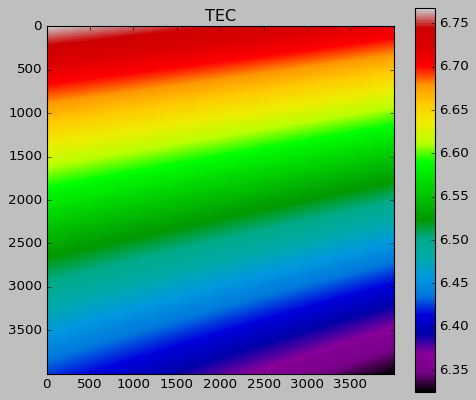

In [41]:
plt.figure(figsize=(7,6))
plt.imshow(pix_4000,cmap="nipy_spectral")
plt.title("TEC")
plt.colorbar()
plt.style.use('classic')
plt.savefig("pix_4000_tec.png")